In [13]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")
print(netflix_df['type'].unique())

['Movie' 'TV Show']


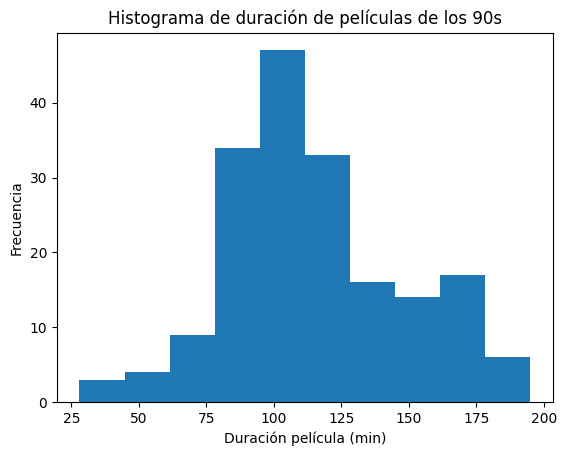

La moda es: 94 minutos


In [14]:
# Filtro de peliculas que salieron entre 1990 y 1999
movies_1990s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000) & (netflix_df['type'] == 'Movie')]

# Histograma
plt.hist(movies_1990s['duration'],bins=10)
plt.xlabel('Duración película (min)')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración de películas de los 90s')
plt.show()

# Imprimir resultados
most_frequent_duration = movies_1990s['duration'].mode()[0]
print("La moda es: "+str(most_frequent_duration)+" minutos")

In [15]:
# Conteo del número de películas de acción de los 90 que duran menos de 90 minutos
# Filtro de peliculas de acción y duración
action_movies_1990s = movies_1990s[(movies_1990s['genre'] == 'Action') & (movies_1990s['duration'] < 90)]
short_movie_count = action_movies_1990s['duration'].count()
print("No. Peliculas de acción de los 90s: "+str(short_movie_count))

No. Peliculas de acción de los 90s: 7


TAREA 1: Filtrar por Año de Lanzamiento

In [16]:
year = 2019
year_filter = netflix_df[netflix_df['release_year'] == year]
print(year_filter[['title','release_year','duration']].head(10))

                            title  release_year  duration
5                             122          2019        95
7                             706          2019       118
11                           3022          2019        91
14                         15-Aug          2019       124
20  #AnneFrank - Parallel Stories          2019        95
27                 ¡Ay, mi madre!          2019        81
50                            1BR          2019        90
75                      40 Sticks          2019        93
78                             4L          2019       105
80                   4th Republic          2019       120


Tarea 2: Contar Programas por Género

In [17]:
movie_genre = pd.DataFrame(netflix_df[['genre']].value_counts().sort_values(ascending=False))
print(movie_genre[['count']].head(10))

                      count
genre                      
Dramas                 1343
Comedies               1029
Action                  696
Children                421
Documentaries           352
Stand-Up                283
Horror Movies           239
International Movies    100
Classic Movies           69
Thrillers                49


Tarea 3: Encontrar las Películas Más Largas

In [18]:
top = 10 # Top X a mostrar
movies_top_duration = netflix_df[netflix_df['type'] == 'Movie']
print(movies_top_duration[['title','duration','genre','country']].nlargest(top,'duration'))

                             title  duration           genre         country
4262        The School of Mischief       253        Comedies           Egypt
2811                No Longer kids       237        Comedies           Egypt
3349                        Sangam       228  Classic Movies           India
2224                        Lagaan       224          Dramas           India
2012                  Jodhaa Akbar       214          Action           India
2068      Kabhi Khushi Kabhie Gham       209          Dramas           India
4050                  The Irishman       209          Dramas   United States
2807  No Direction Home: Bob Dylan       208   Documentaries  United Kingdom
3994            The Gospel of Luke       205          Dramas   United States
4692          What's Your Raashee?       203        Comedies           India


Tarea 4: Filtrar Contenido por País

In [19]:
country = 'Egypt'

movies_country = netflix_df[netflix_df['country'] == country]
print(movies_country[['title', 'country', 'release_year', 'genre', 'type']])

count_movies_country = movies_country.count()
print('No. peliculas y series del país '+country+': '+str(count_movies_country['country']))

                    title country  release_year           genre   type
5                     122   Egypt          2019   Horror Movies  Movie
70      30 Days of Luxury   Egypt          2016        Comedies  Movie
263   Alexandria ... Why?   Egypt          1979  Classic Movies  Movie
310          Amar's Hands   Egypt          2011          Dramas  Movie
337     An Egyptian Story   Egypt          1982  Classic Movies  Movie
...                   ...     ...           ...             ...    ...
4747              X Large   Egypt          2011        Comedies  Movie
4760            يوم الدين   Egypt          2018          Dramas  Movie
4788               اشتباك   Egypt          2016          Dramas  Movie
4789            الف مبروك   Egypt          2009        Comedies  Movie
4794            Zaki Chan   Egypt          2005        Comedies  Movie

[91 rows x 5 columns]
No. peliculas y series del país Egypt: 91


Tarea 5: Análisis de Directores

In [20]:
directors = pd.DataFrame(netflix_df.sort_values('director',ascending=False))
print(directors['director'].value_counts())

director
Raúl Campos, Jan Suter               18
Marcus Raboy                         15
Jay Karas                            14
Cathy Garcia-Molina                  13
Martin Scorsese                      12
                                     ..
Syed Atif Ali                         1
Mads Matthiesen                       1
Madonna                               1
Sylvie Verheyde                       1
Kiko Cruz Claverol, Patricia Font     1
Name: count, Length: 3615, dtype: int64


Tarea 6: Distribución de Películas y Series por Año

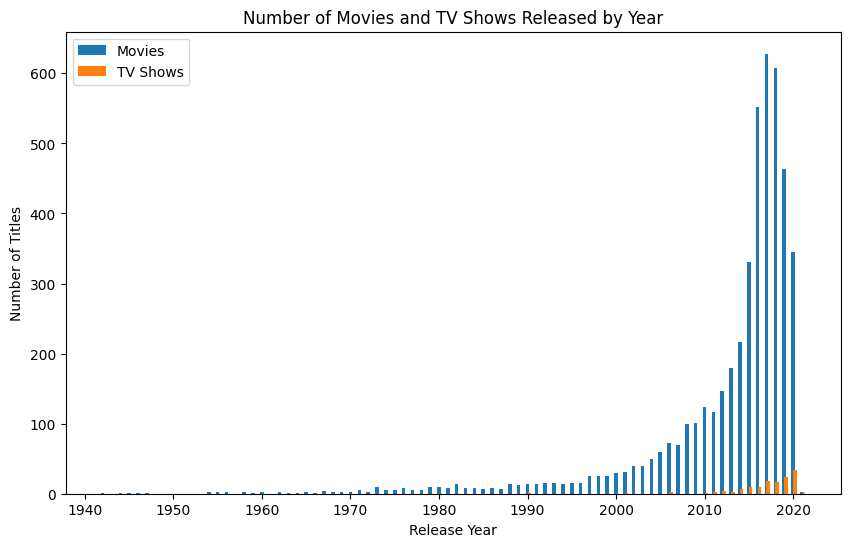

In [21]:
#Genera un gráfico de barras que muestre cuántas películas y cuántas series (campo type) se han lanzado cada año (release_year).
# Usa una librería como Matplotlib o Seaborn para crear el gráfico.

movies = netflix_df[netflix_df['type'] == 'Movie']
movies_by_year = movies.groupby('release_year').size()

series = netflix_df[netflix_df['type'] == 'TV Show']
series_by_year = series.groupby('release_year').size()

# Crear un gráfico de barras para comparar
plt.figure(figsize=(10, 6))

# Graficar las películas por año
plt.bar(movies_by_year.index, movies_by_year, width=0.4, label='Movies', align='center')

# Graficar las series por año
plt.bar(series_by_year.index, series_by_year, width=0.4, label='TV Shows', align='edge')

# Añadir etiquetas y título
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movies and TV Shows Released by Year')
plt.legend()

type          Movie  TV Show
release_year                
1942              1        0
1944              1        0
1945              1        0
1946              1        0
1947              1        0
...             ...      ...
2017            628       18
2018            607       17
2019            464       24
2020            345       34
2021              3        1

[71 rows x 2 columns]


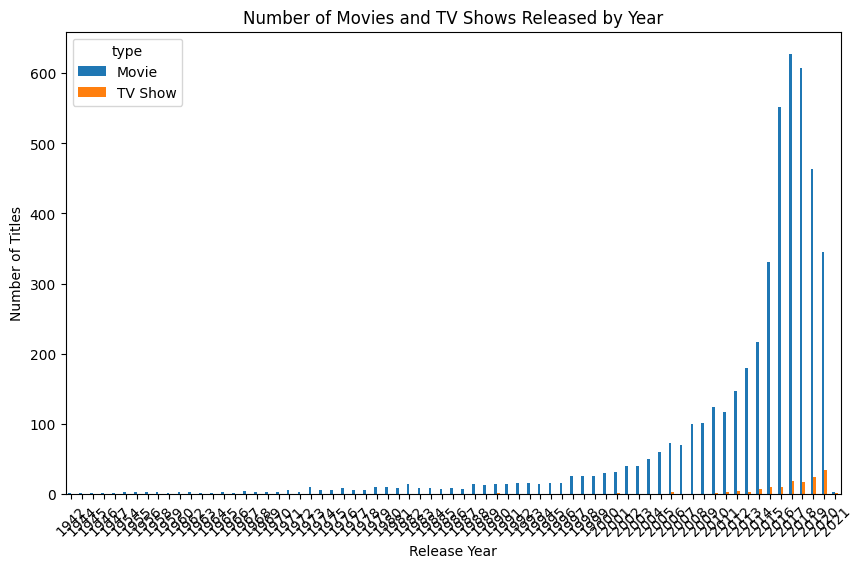

In [22]:
content_by_year = netflix_df.pivot_table(index='release_year', columns='type', aggfunc='size', fill_value=0)
print(content_by_year)
content_by_year.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movies and TV Shows Released by Year')
plt.xticks(rotation=45)
plt.show()


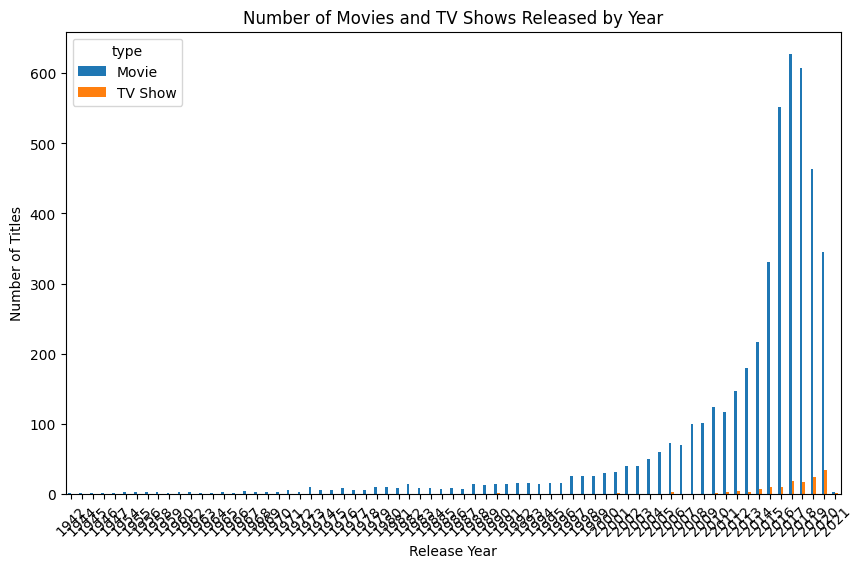

In [23]:
# Usar crosstab para contar películas y series por año
content_by_year = pd.crosstab(netflix_df['release_year'], netflix_df['type'])

# Graficar el resultado
content_by_year.plot(kind='bar', figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movies and TV Shows Released by Year')
plt.xticks(rotation=45)
plt.show()


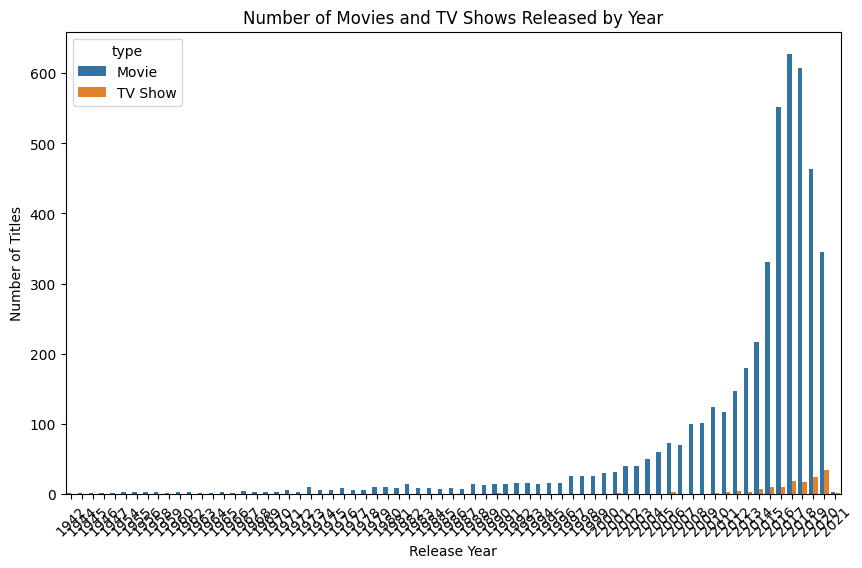

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar películas y series por año
content_by_year = netflix_df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Crear gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='release_year', y='count', hue='type', data=content_by_year)

# Añadir etiquetas y título
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movies and TV Shows Released by Year')
plt.xticks(rotation=45)
plt.show()
